In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 96
import numpy as np
import pandas as pd
import seaborn as sns

# import libraries for biological data analysis
from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting



import warnings
warnings.filterwarnings('ignore')


### CTCF peaks from chip-seq

In [2]:
ctcf = bioframe.read_table('/project/fudenber_735/yxiao977/frip_sm_data/ChIP_fastqs_maps/Justice_2020_mm10/SRR10099910/SRR10099910.q30.mm10.sort_peaks.narrowPeak', schema='bed')
ctcf['mid']=(ctcf.end+ctcf.start)/2

In [3]:
ctcf

,chrom,start,end,name,score,strand,mid
0,chr1,4142587,4142853,SRR10099910.q30.mm10.sort_peak_1,333,.,4142720.0
1,chr1,4228248,4228459,SRR10099910.q30.mm10.sort_peak_2,185,.,4228353.5
2,chr1,4297196,4297351,SRR10099910.q30.mm10.sort_peak_3,55,.,4297273.5
3,chr1,4332532,4332829,SRR10099910.q30.mm10.sort_peak_4,371,.,4332680.5
4,chr1,4346252,4346530,SRR10099910.q30.mm10.sort_peak_5,312,.,4346391.0
...,...,...,...,...,...,...,...
50079,chrY,90805066,90805341,SRR10099910.q30.mm10.sort_peak_50080,610,.,90805203.5
50080,chrY,90807693,90807937,SRR10099910.q30.mm10.sort_peak_50081,538,.,90807815.0
50081,chrY,90808769,90808990,SRR10099910.q30.mm10.sort_peak_50082,465,.,90808879.5
50082,chrY,90810878,90811138,SRR10099910.q30.mm10.sort_peak_50083,377,.,90811008.0


In [4]:
ctcf['quartile_score']=pd.qcut(ctcf['score'],4, labels=False) + 1
ctcf_quart=ctcf[ctcf['quartile_score']==4]
#ctcf_quart

### ctcf from JASPAR data

In [5]:
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'
motif=bioframe.read_table(direct)
motif.head()
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})
motif

,chrom,start,end,name,score,pval,strand
0,chr10,3103662,3103681,CTCF,814,410,-
1,chr10,3108121,3108140,CTCF,859,504,-
2,chr10,3119020,3119039,CTCF,801,386,-
3,chr10,3124081,3124100,CTCF,807,397,-
4,chr10,3127081,3127100,CTCF,810,403,+
...,...,...,...,...,...,...,...
825505,chrY,90829177,90829196,CTCF,842,465,+
825506,chrY,90839573,90839592,CTCF,804,392,+
825507,chrY,90839785,90839804,CTCF,885,565,-
825508,chrY,90839787,90839806,CTCF,842,465,+


In [6]:
motif['quartile_score_motif']=pd.qcut(motif['score'],4,labels=False) + 1
motif

,chrom,start,end,name,score,pval,strand,quartile_score_motif
0,chr10,3103662,3103681,CTCF,814,410,-,2
1,chr10,3108121,3108140,CTCF,859,504,-,4
2,chr10,3119020,3119039,CTCF,801,386,-,1
3,chr10,3124081,3124100,CTCF,807,397,-,1
4,chr10,3127081,3127100,CTCF,810,403,+,2
...,...,...,...,...,...,...,...,...
825505,chrY,90829177,90829196,CTCF,842,465,+,4
825506,chrY,90839573,90839592,CTCF,804,392,+,1
825507,chrY,90839785,90839804,CTCF,885,565,-,4
825508,chrY,90839787,90839806,CTCF,842,465,+,4


### overlap

In [7]:
peaks_motifs = bioframe.overlap(ctcf,motif,how='inner')
peaks_motifs = peaks_motifs[(peaks_motifs['chrom']!= 'chrX')&(peaks_motifs['chrom']!= 'chrY')]
peaks_motifs

,chrom,start,end,name,score,strand,mid,quartile_score,chrom_,start_,end_,name_,score_,pval_,strand_,quartile_score_motif_
0,chr3,3302705,3302974,SRR10099910.q30.mm10.sort_peak_27807,436,.,3302839.5,3,chr3,3302835,3302854,CTCF,868,522,+,4
1,chr3,3308510,3308815,SRR10099910.q30.mm10.sort_peak_27808,400,.,3308662.5,3,chr3,3308652,3308671,CTCF,805,394,-,1
2,chr3,3388129,3388385,SRR10099910.q30.mm10.sort_peak_27809,321,.,3388257.0,3,chr3,3388229,3388248,CTCF,909,631,+,4
3,chr3,3502652,3502972,SRR10099910.q30.mm10.sort_peak_27810,479,.,3502812.0,3,chr3,3502789,3502808,CTCF,860,505,+,4
4,chr3,3751655,3751938,SRR10099910.q30.mm10.sort_peak_27812,467,.,3751796.5,3,chr3,3751767,3751786,CTCF,945,749,+,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54037,chr15,99000470,99000857,SRR10099910.q30.mm10.sort_peak_16981,672,.,99000663.5,4,chr15,99000469,99000488,CTCF,812,406,-,2
54038,chr15,99678022,99678418,SRR10099910.q30.mm10.sort_peak_17035,434,.,99678220.0,3,chr15,99678018,99678037,CTCF,866,519,-,4
54039,chr15,101387206,101387433,SRR10099910.q30.mm10.sort_peak_17138,149,.,101387319.5,2,chr15,101387194,101387213,CTCF,808,398,-,1
54040,chr15,101973702,101974069,SRR10099910.q30.mm10.sort_peak_17161,1304,.,101973885.5,4,chr15,101973690,101973709,CTCF,806,395,-,1


In [8]:
peaks_motifs=peaks_motifs.rename(columns={'strand':'strand_','strand_':'strand'})
peaks_motifs=peaks_motifs[['chrom','start','end','name','score','mid','quartile_score','strand']]
peaks_motifs

,chrom,start,end,name,score,mid,quartile_score,strand
0,chr3,3302705,3302974,SRR10099910.q30.mm10.sort_peak_27807,436,3302839.5,3,+
1,chr3,3308510,3308815,SRR10099910.q30.mm10.sort_peak_27808,400,3308662.5,3,-
2,chr3,3388129,3388385,SRR10099910.q30.mm10.sort_peak_27809,321,3388257.0,3,+
3,chr3,3502652,3502972,SRR10099910.q30.mm10.sort_peak_27810,479,3502812.0,3,+
4,chr3,3751655,3751938,SRR10099910.q30.mm10.sort_peak_27812,467,3751796.5,3,+
...,...,...,...,...,...,...,...,...
54037,chr15,99000470,99000857,SRR10099910.q30.mm10.sort_peak_16981,672,99000663.5,4,-
54038,chr15,99678022,99678418,SRR10099910.q30.mm10.sort_peak_17035,434,99678220.0,3,-
54039,chr15,101387206,101387433,SRR10099910.q30.mm10.sort_peak_17138,149,101387319.5,2,-
54040,chr15,101973702,101974069,SRR10099910.q30.mm10.sort_peak_17161,1304,101973885.5,4,-


### binning the sites

In [9]:
peaks_motifs_cluster = bioframe.cluster(peaks_motifs, min_dist=10000)#
peaks_motifs_cluster

,chrom,start,end,name,score,mid,quartile_score,strand,cluster,cluster_start,cluster_end
0,chr3,3302705,3302974,SRR10099910.q30.mm10.sort_peak_27807,436,3302839.5,3,+,17267,3302705,3308815
1,chr3,3308510,3308815,SRR10099910.q30.mm10.sort_peak_27808,400,3308662.5,3,-,17267,3302705,3308815
2,chr3,3388129,3388385,SRR10099910.q30.mm10.sort_peak_27809,321,3388257.0,3,+,17268,3388129,3388385
3,chr3,3502652,3502972,SRR10099910.q30.mm10.sort_peak_27810,479,3502812.0,3,+,17269,3502652,3502972
4,chr3,3751655,3751938,SRR10099910.q30.mm10.sort_peak_27812,467,3751796.5,3,+,17270,3751655,3751938
...,...,...,...,...,...,...,...,...,...,...,...
52549,chr15,99000470,99000857,SRR10099910.q30.mm10.sort_peak_16981,672,99000663.5,4,-,10645,98993030,99009915
52550,chr15,99678022,99678418,SRR10099910.q30.mm10.sort_peak_17035,434,99678220.0,3,-,10664,99668894,99689114
52551,chr15,101387206,101387433,SRR10099910.q30.mm10.sort_peak_17138,149,101387319.5,2,-,10713,101387206,101395192
52552,chr15,101973702,101974069,SRR10099910.q30.mm10.sort_peak_17161,1304,101973885.5,4,-,10728,101970629,101988987


In [10]:
# Group by 'chuster_start' and 'cluster_end' and get the index of rows with the max 'score' within each group
idx = peaks_motifs_cluster.groupby(['cluster_start', 'cluster_end'])['score'].idxmax()

# Filter the dataframe to keep only the rows with the max 'score' in each group
peaks_motifs_bin_s = peaks_motifs_cluster.loc[idx].reset_index(drop=True)

peaks_motifs_bin_s


,chrom,start,end,name,score,mid,quartile_score,strand,cluster,cluster_start,cluster_end
0,chrM,50,1684,SRR10099910.q30.mm10.sort_peak_48675,146,867.0,2,-,29985,50,1684
1,chr18,3005726,3005978,SRR10099910.q30.mm10.sort_peak_21060,515,3005852.0,3,-,13137,3005726,3005978
2,chr18,3039488,3039650,SRR10099910.q30.mm10.sort_peak_21061,65,3039569.0,1,-,13138,3039488,3039650
3,chr14,3050178,3050329,SRR10099910.q30.mm10.sort_peak_13317,95,3050253.5,1,-,8283,3050178,3050329
4,chr4,3052367,3052649,SRR10099910.q30.mm10.sort_peak_30167,210,3052508.0,2,+,18804,3052367,3052649
...,...,...,...,...,...,...,...,...,...,...,...
29981,chr1,194879563,194879893,SRR10099910.q30.mm10.sort_peak_3195,894,194879728.0,4,+,2082,194879563,194879893
29982,chr1,194962248,194962539,SRR10099910.q30.mm10.sort_peak_3198,478,194962393.5,3,-,2083,194952981,194962539
29983,chr1,194976166,194976743,SRR10099910.q30.mm10.sort_peak_3199,596,194976454.5,4,+,2084,194976166,194976743
29984,chr1,195040477,195040747,SRR10099910.q30.mm10.sort_peak_3200,553,195040612.0,3,+,2085,195040477,195040747


### loading Hi-C data, Bonev 2017

In [11]:
# high-resolution reprocessed publically-available data from Bonev et al. 2017
res = 10_000
bonev_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_file+'::resolutions/'+str(res))
view_df_bonev = cooltools.lib.make_cooler_view(bonev_cooler)[:19]

### loading data, Liu_deWit

In [12]:
# data from Liu& deWit et al. 
prefix_dir_liu = '/project/fudenber_735/GEO/liu_deWit_GSE181848/'
cooler_prefix_liu = prefix_dir_liu
sample_dict_liu ={
    'Wapl-0h':'GSM5512837_HiC.01_WAPL_0h.mcool',
    'Wapl-6h':'GSM5512838_HiC.02_WAPL_6h.mcool'
}
sample='Wapl-6h'
mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]

In [13]:
# data from Liu 2021
prefix_dir_liu_new = '/project/fudenber_735/GEO/liu_deWit_2021_GSE135180/distiller-mm10/results/coolers_library/'
cooler_prefix_liu_new = prefix_dir_liu_new
sample_dict_liu_new ={
    'Wapl-0h_new':'liu_wapl0h.mm10.mapq_30.1000.mcool',
    'Wapl-24h_new':'liu_wapl24h.mm10.mapq_30.1000.mcool'
}
sample='Wapl-24h_new'
mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
liu_new_cooler = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
view_df_liu_new = cooltools.lib.make_cooler_view(liu_new_cooler)[:19]

### piling up, analysis

In [14]:
from chromoscores.snipping import tad_snippet_sectors
from chromoscores.snipping import *
from chromoscores.snipping import peak_snipping
from chromoscores.scorefunctions import peak_score

In [15]:
# Bonev et al 2017

beginning = 100_000
mindist = 90_000
band_edges = np.append([ beginning], (90_000 + 15_000 * 1.3 ** np.arange(1,34)))
band_edge_list=list(band_edges[:])
print(band_edge_list[:31])
print(len(band_edge_list))

beginning = 100_000
mindist = 90_000
band_edges = np.append([ beginning], (85_000 + 11_000 * 1.3 ** np.arange(1,34)))
band_edge_list=list(band_edges[:])
print(band_edge_list[:31])
print(len(band_edge_list))

In [16]:
# simulation consistent bins

beginning = 100_000
mindist = 90_000
band_edges = np.append([ beginning, 110_000], (100_000 + 15_000 * 1.3 ** np.arange(1,34)))
band_edge_list=list(band_edges[:])
print(band_edge_list[:31])
print(len(band_edge_list))

[100000.0, 110000.0, 119500.0, 125350.0, 132955.0, 142841.5, 155693.95, 172402.135, 194122.77550000005, 222359.60815000004, 259067.49059500004, 306787.7377735001, 368824.05910555006, 449471.2768372151, 554312.6598883797, 690606.4578548936, 867788.3952113617, 1098124.9137747702, 1397562.3879072014, 1786831.104279362, 2292880.4355631704, 2950744.566232122, 3805967.9361017584, 4917758.316932286, 6363085.812011973, 8242011.555615564, 10684615.022300234, 13859999.528990304, 17987999.387687396, 23354399.203993615, 30330718.965191703]
35


INFO:coolpuppy:('chr1', 'chr1'): 233780
INFO:coolpuppy:Total number of piled up windows: 233780


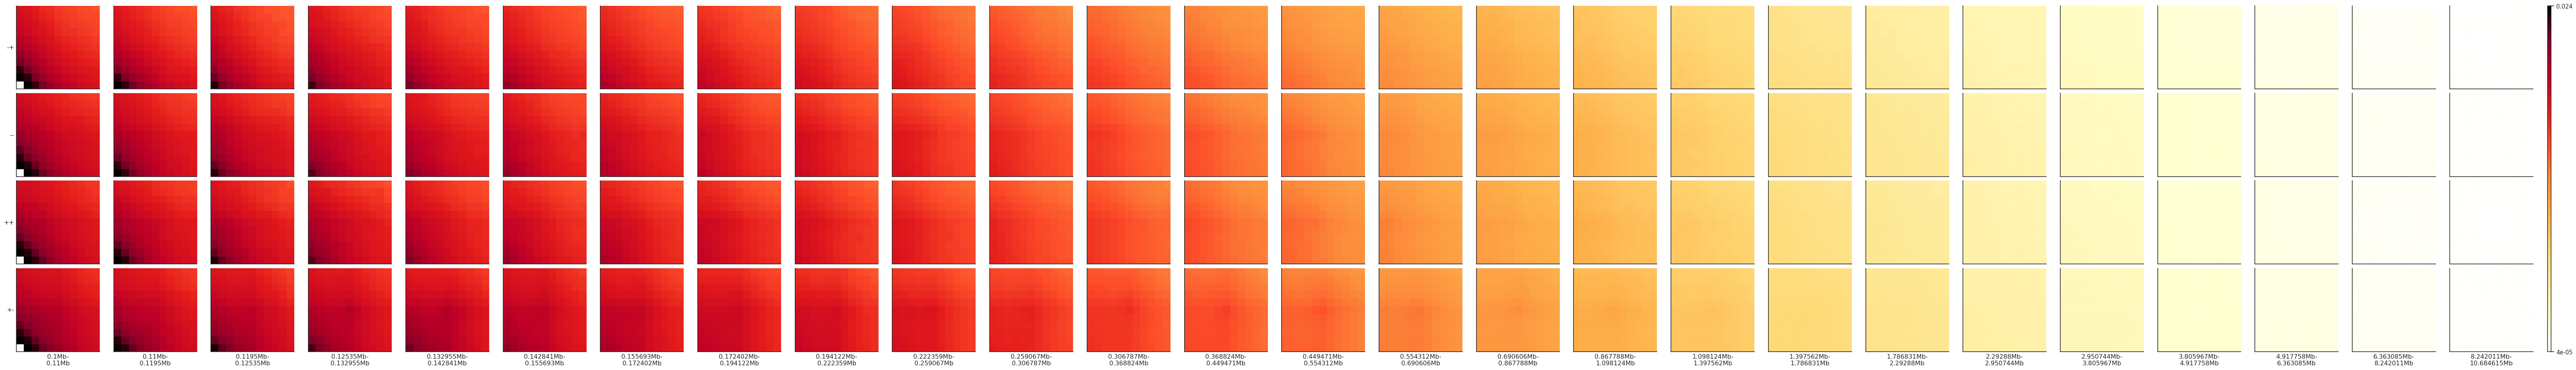

In [17]:
sites=peaks_motifs_bin_s


sample_dict = ['WT']
for sample in sample_dict:
    f=open('dots_vs_distance_peaks_motifs_%s_Bonev_bin_s.csv'%sample,'w')
    f.write('orientation,dist,peak_score\n')
    clr =  bonev_cooler
    pup = coolpup.pileup(clr, 
                         sites, 
                         features_format='bed', view_df=view_df_bonev[:1],
                         flip_negative_strand=True,
                         by_distance=np.array(band_edges),
                         by_strand=True, mindist=mindist, maxdist=10_000_000,
                        flank=50_000, min_diag=2,
                        nproc=19
                        )
    for i in range(len(pup['data'])):
        pseudocount = np.mean(np.isfinite(pup['data'][i]))/1000
        score=peak_score(pup['data'][i],3,4,pseudocount)
        if pup['separation'][i]=='all':
            continue
        
        dist=np.mean(pup['distance_band'][i])
        orientation=pup['orientation'][i]
        f.write('%s,%s,%s\n'%(orientation,dist,score))
    fg = plotpup.plot(pup,  rows='orientation',cols='separation',
                  row_order=['-+', '--', '++', '+-'],score=False, 
                  cmap='fall', 
                  scale='log', sym=False,
                  height=3)
    
    plt.show()
    f.close()

[100000.0, 110000.0, 119500.0, 125350.0, 132955.0, 142841.5, 155693.95, 172402.135, 194122.77550000005, 222359.60815000004, 259067.49059500004, 306787.7377735001, 368824.05910555006, 449471.2768372151, 554312.6598883797, 690606.4578548936, 867788.3952113617, 1098124.9137747702, 1397562.3879072014, 1786831.104279362, 2292880.4355631704, 2950744.566232122, 3805967.9361017584, 4917758.316932286, 6363085.812011973, 8242011.555615564, 10684615.022300234, 13859999.528990304, 17987999.387687396, 23354399.203993615, 30330718.965191703, 39399934.654749215, 51189915.05117398, 66516889.566526175, 86441956.43648404]


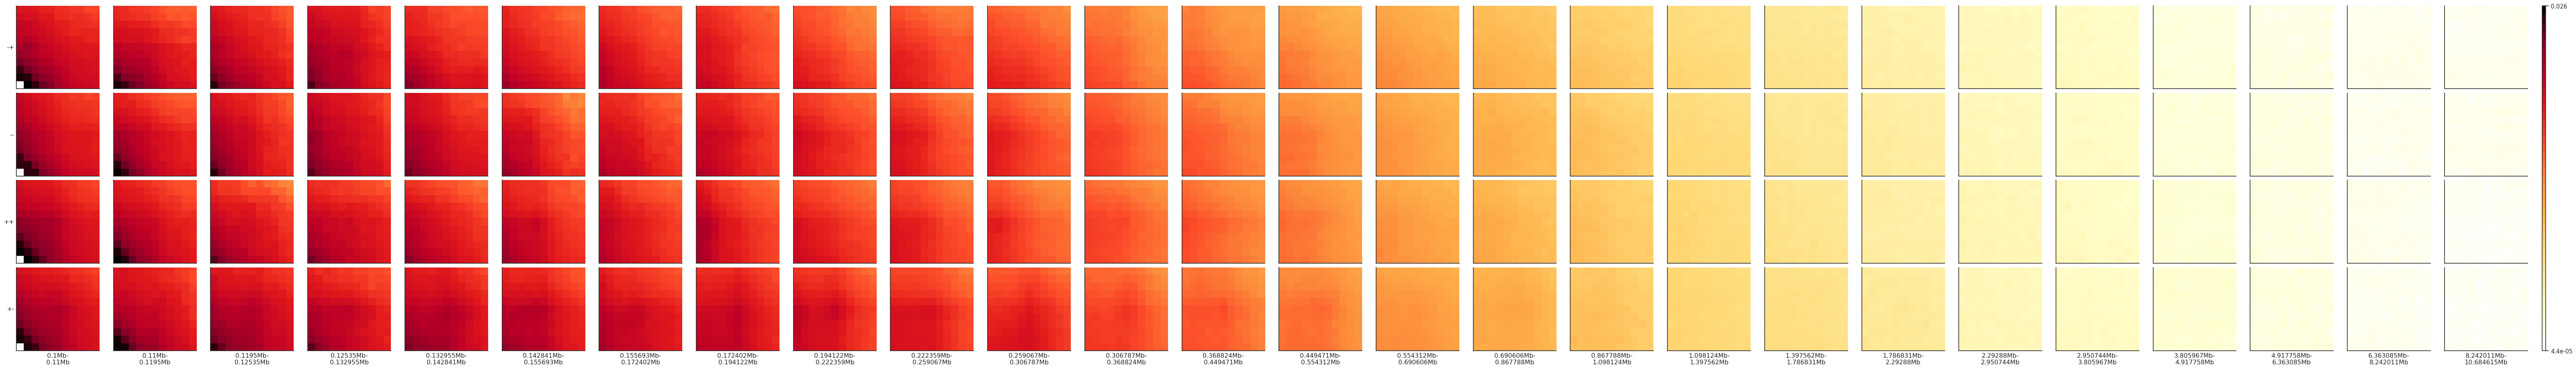

In [28]:
sites=peaks_motifs_quartile.copy()

sample_dict = ['WT']
for sample in sample_dict:
    f=open('dots_vs_distance_peaks_motifs_%s_Bonev_quartile.csv'%sample,'w')
    f.write('orientation,dist,n,peak_score\n')
    clr =  bonev_cooler
    pup = coolpup.pileup(clr, 
                         sites, 
                         features_format='bed', view_df=view_df_bonev[:1],
                         flip_negative_strand=True,
                         by_distance=np.array(band_edges),
                         by_strand=True, mindist=mindist, maxdist=10_000_000,
                        flank=50_000, min_diag=2,
                        nproc=19
                        )
    for i in range(len(pup['data'])):
        pseudocount = np.mean(np.isfinite(pup['data'][i]))/1000
        score=peak_score(pup['data'][i],3,4,pseudocount)
        if pup['separation'][i]=='all':
            continue
        
        dist=np.mean(pup['distance_band'][i])
        orientation=pup['orientation'][i]
        n = pup['n'][i]
        f.write('%s,%s,%s,%s\n'%(orientation,dist,n,score))
    fg = plotpup.plot(pup,  rows='orientation',cols='separation',
                  row_order=['-+', '--', '++', '+-'],score=False, 
                  cmap='fall', 
                  scale='log', sym=False,
                  height=3)
    
    plt.show()
    f.close()

# Liu et al 

[100000.0, 104500.0, 110350.0, 117955.0, 127841.5, 140693.95, 157402.135, 179122.77550000005, 207359.60815000004, 244067.49059500004, 291787.7377735001, 353824.05910555006, 434471.2768372151, 539312.6598883797, 675606.4578548936, 852788.3952113617, 1083124.9137747702, 1382562.3879072014, 1771831.104279362, 2277880.4355631704, 2935744.566232122, 3790967.9361017584, 4902758.316932286, 6348085.812011973, 8227011.555615564, 10669615.022300234, 13844999.528990304, 17972999.387687396, 23339399.203993615, 30315718.965191703, 39384934.654749215, 51174915.05117398, 66501889.566526175, 86426956.43648404]


INFO:coolpuppy:('chr18', 'chr18'): 9687
INFO:coolpuppy:('chr3', 'chr3'): 16991
INFO:coolpuppy:('chr13', 'chr13'): 15499
INFO:coolpuppy:('chr16', 'chr16'): 13623
INFO:coolpuppy:('chr14', 'chr14'): 20703
INFO:coolpuppy:('chr19', 'chr19'): 24170
INFO:coolpuppy:('chr12', 'chr12'): 19842
INFO:coolpuppy:('chr1', 'chr1'): 24058
INFO:coolpuppy:('chr10', 'chr10'): 34539
INFO:coolpuppy:('chr17', 'chr17'): 44799
INFO:coolpuppy:('chr15', 'chr15'): 38965
INFO:coolpuppy:('chr2', 'chr2'): 69298
INFO:coolpuppy:('chr4', 'chr4'): 84362
INFO:coolpuppy:('chr11', 'chr11'): 96073
INFO:coolpuppy:Total number of piled up windows: 512609


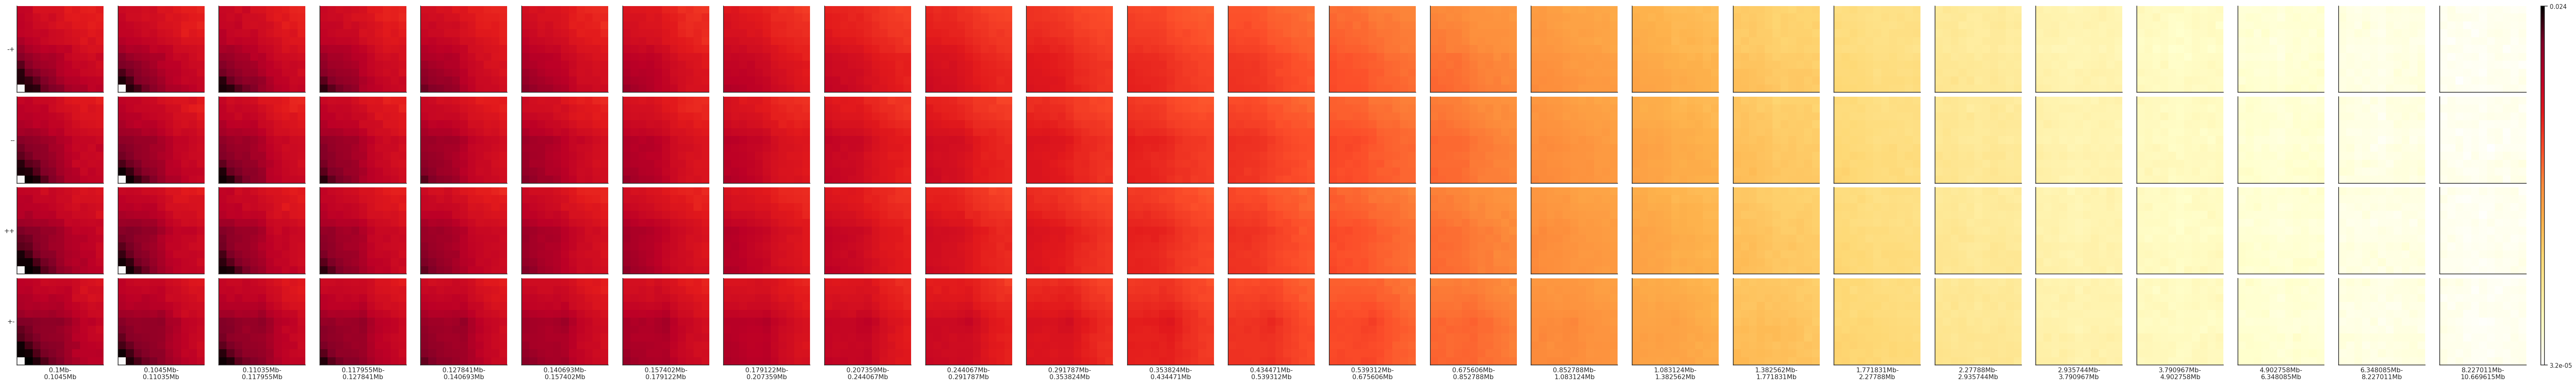

INFO:coolpuppy:('chr18', 'chr18'): 9687
INFO:coolpuppy:('chr3', 'chr3'): 16991
INFO:coolpuppy:('chr16', 'chr16'): 13623
INFO:coolpuppy:('chr13', 'chr13'): 15499
INFO:coolpuppy:('chr14', 'chr14'): 20703
INFO:coolpuppy:('chr19', 'chr19'): 24170
INFO:coolpuppy:('chr12', 'chr12'): 19842
INFO:coolpuppy:('chr1', 'chr1'): 24058
INFO:coolpuppy:('chr10', 'chr10'): 34539
INFO:coolpuppy:('chr17', 'chr17'): 44799
INFO:coolpuppy:('chr15', 'chr15'): 38965
INFO:coolpuppy:('chr2', 'chr2'): 69298
INFO:coolpuppy:('chr4', 'chr4'): 84362
INFO:coolpuppy:('chr11', 'chr11'): 96073
INFO:coolpuppy:Total number of piled up windows: 512609


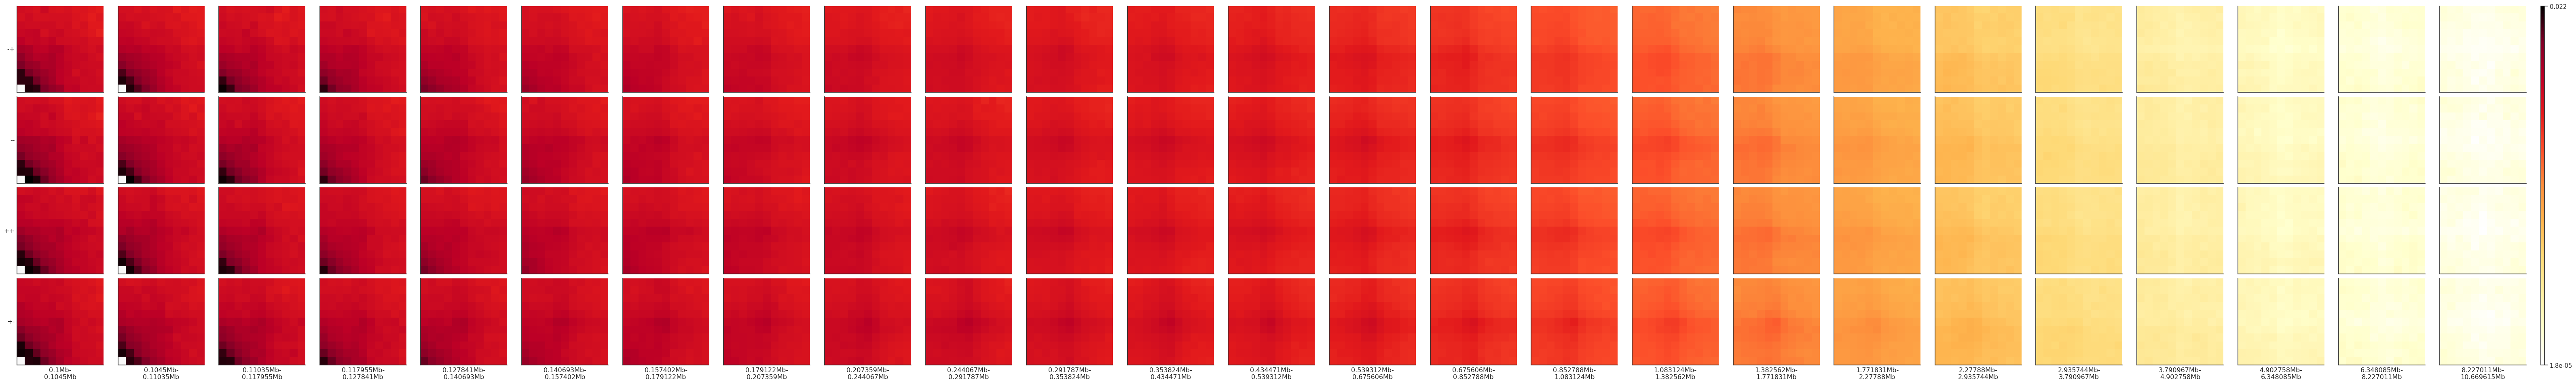

In [61]:
sites=peaks_motifs_quartile.copy()


print(band_edge_list)

for sample in sample_dict_liu:
    f=open('dots_vs_distance_peaks_motifs_%s_Liu_quartile.csv'%sample,'w')
    f.write('orientation,dist,peak_score\n')
    mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
    liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
    view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]
    clr =  liu_cooler
    pup = coolpup.pileup(clr, 
                         sites, 
                         features_format='bed', view_df=view_df_liu[:19],
                         flip_negative_strand=True,
                         by_distance=np.array(band_edges),
                         by_strand=True, mindist=mindist, maxdist=10_000_000,
                        flank=50_000, min_diag=2,
                        nproc=19
                        )
    for i in range(len(pup['data'])):
        pseudocount = np.mean(np.isfinite(pup['data'][i]))/1000
        score=peak_score(pup['data'][i],3,4,pseudocount)
        if pup['separation'][i]=='all':
            continue
#        
        dist=np.mean(pup['distance_band'][i])
        orientation=pup['orientation'][i]
        f.write('%s,%s,%s\n'%(orientation,dist,score))
    fg = plotpup.plot(pup,  rows='orientation',cols='separation',
                  row_order=['-+', '--', '++', '+-'],score=False, 
                  cmap='fall', 
                  scale='log', sym=False,
                  height=3)
    
    plt.show()
    f.close()

[100000.0, 110000.0, 119500.0, 125350.0, 132955.0, 142841.5, 155693.95, 172402.135, 194122.77550000005, 222359.60815000004, 259067.49059500004, 306787.7377735001, 368824.05910555006, 449471.2768372151, 554312.6598883797, 690606.4578548936, 867788.3952113617, 1098124.9137747702, 1397562.3879072014, 1786831.104279362, 2292880.4355631704, 2950744.566232122, 3805967.9361017584, 4917758.316932286, 6363085.812011973, 8242011.555615564, 10684615.022300234, 13859999.528990304, 17987999.387687396, 23354399.203993615, 30330718.965191703, 39399934.654749215, 51189915.05117398, 66516889.566526175, 86441956.43648404]


INFO:coolpuppy:('chr19', 'chr19'): 98484
INFO:coolpuppy:('chr14', 'chr14'): 120089
INFO:coolpuppy:('chr10', 'chr10'): 153121
INFO:coolpuppy:('chr15', 'chr15'): 145860
INFO:coolpuppy:('chr18', 'chr18'): 80119
INFO:coolpuppy:('chr16', 'chr16'): 102754
INFO:coolpuppy:('chr1', 'chr1'): 201599
INFO:coolpuppy:('chr13', 'chr13'): 130934
INFO:coolpuppy:('chr12', 'chr12'): 122134
INFO:coolpuppy:('chr3', 'chr3'): 130089
INFO:coolpuppy:('chr2', 'chr2'): 267577
INFO:coolpuppy:('chr17', 'chr17'): 158326
INFO:coolpuppy:('chr4', 'chr4'): 257534
INFO:coolpuppy:('chr11', 'chr11'): 315384
INFO:coolpuppy:Total number of piled up windows: 2284004


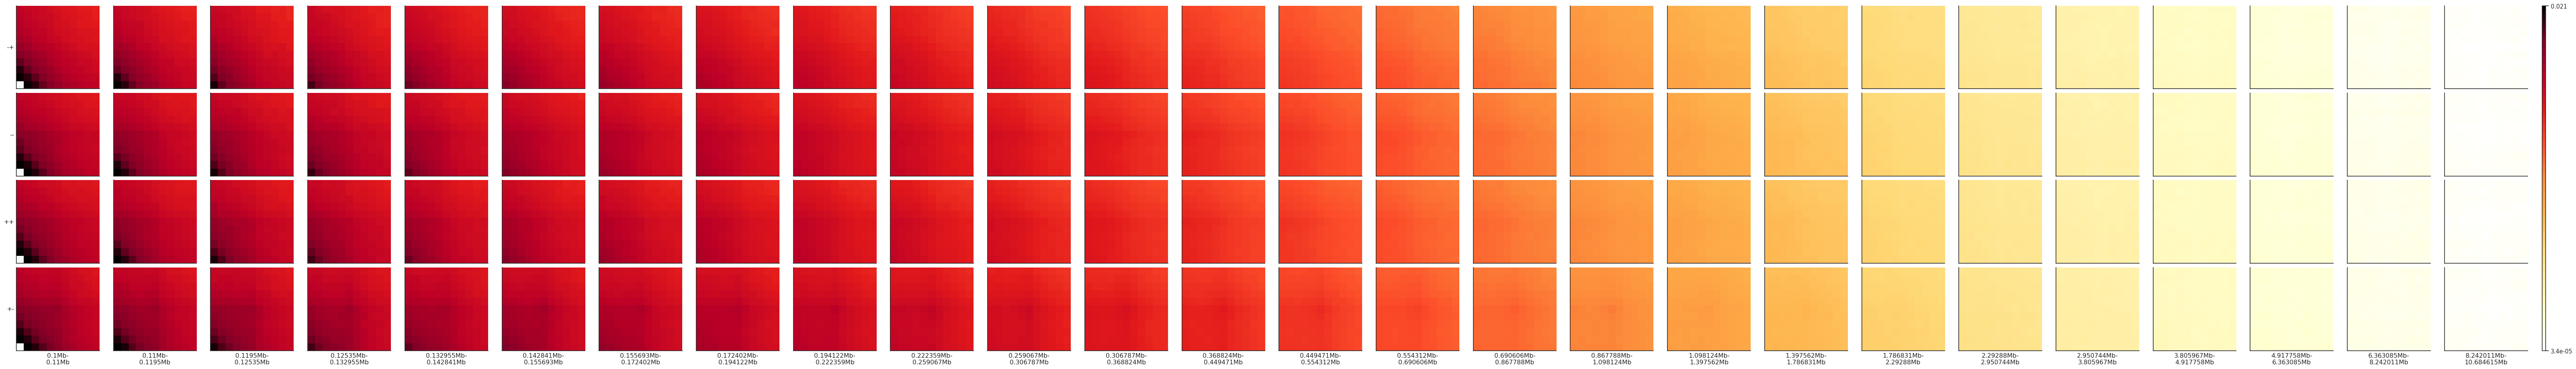

INFO:coolpuppy:('chr18', 'chr18'): 80119
INFO:coolpuppy:('chr16', 'chr16'): 102754
INFO:coolpuppy:('chr14', 'chr14'): 120089
INFO:coolpuppy:('chr15', 'chr15'): 145860
INFO:coolpuppy:('chr19', 'chr19'): 98484
INFO:coolpuppy:('chr3', 'chr3'): 130089
INFO:coolpuppy:('chr17', 'chr17'): 158326
INFO:coolpuppy:('chr12', 'chr12'): 122134
INFO:coolpuppy:('chr13', 'chr13'): 130934
INFO:coolpuppy:('chr4', 'chr4'): 257534
INFO:coolpuppy:('chr10', 'chr10'): 153121
INFO:coolpuppy:('chr1', 'chr1'): 201599
INFO:coolpuppy:('chr2', 'chr2'): 267577
INFO:coolpuppy:('chr11', 'chr11'): 315384
INFO:coolpuppy:Total number of piled up windows: 2284004


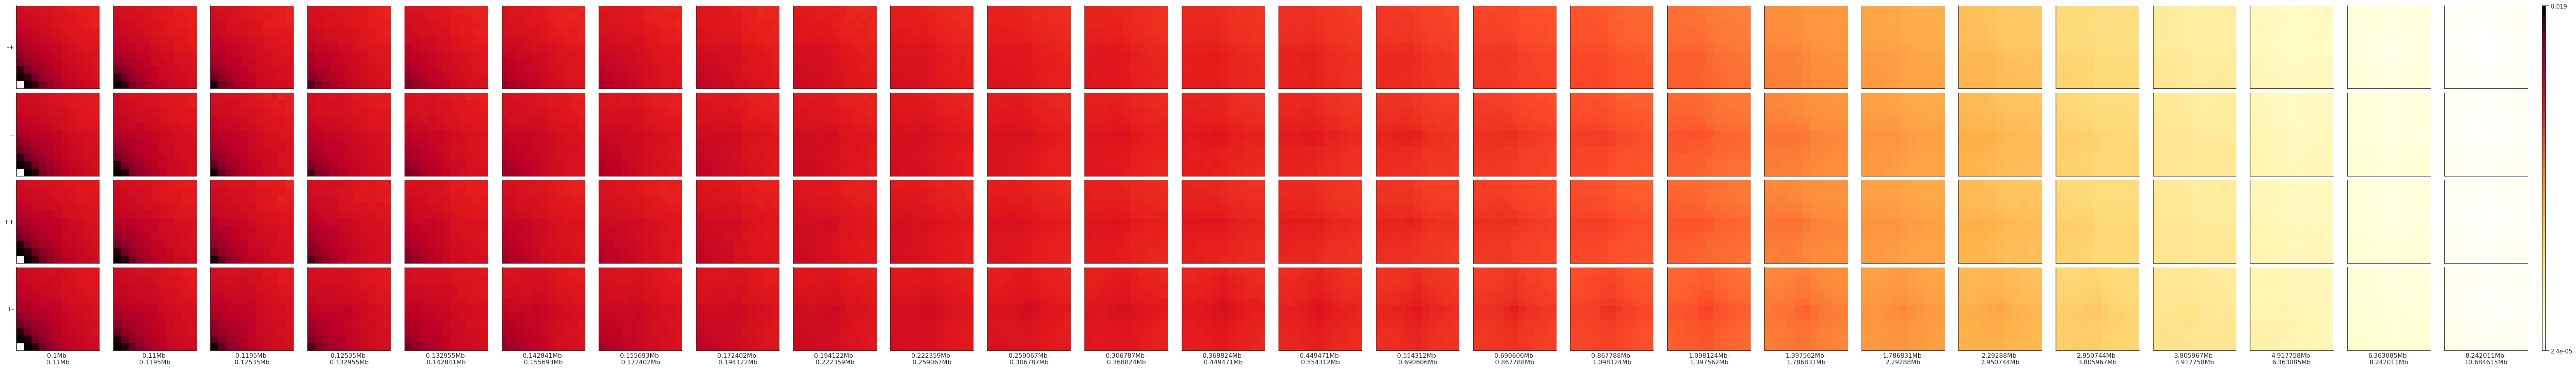

In [33]:
sites=peaks_motifs_bin_s.copy()

sample_dict_liu ={
    'Wapl-0h':'GSM5512837_HiC.01_WAPL_0h.mcool',
    'Wapl-6h':'GSM5512838_HiC.02_WAPL_6h.mcool'
}
print(band_edge_list)
mindist = 100_000
for sample in sample_dict_liu:
    f=open('dots_vs_distance_peaks_motifs_%s_Liu_bin_s_pseudo1000.csv'%sample,'w')
    f.write('orientation,dist,n,peak_score\n')
    mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
    liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
    view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]
    clr =  liu_cooler
    pup = coolpup.pileup(clr, 
                         sites, 
                         features_format='bed', view_df=view_df_liu[:19],
                         flip_negative_strand=True,
                         by_distance=np.array(band_edges),
                         by_strand=True, mindist=mindist, maxdist=10_000_000,
                        flank=50_000, min_diag=2,
                        nproc=19
                        )
    for i in range(len(pup['data'])):
        pseudocount = np.mean(np.isfinite(pup['data'][i]))/1000
        score=peak_score(pup['data'][i],3,4,pseudocount)
        if pup['separation'][i]=='all':
            continue
        
        dist=np.mean(pup['distance_band'][i])
        orientation=pup['orientation'][i]
        n = pup['n'][i]
        f.write('%s,%s,%s,%s\n'%(orientation,dist,n,score))
    fg = plotpup.plot(pup,  rows='orientation',cols='separation',
                  row_order=['-+', '--', '++', '+-'],score=False, 
                  cmap='fall', 
                  scale='log', sym=False,
                  height=3)
    
    plt.show()
    f.close()

### Liu et al 2021

[90000.0, 105000.0, 112500.0, 123750.0, 140625.0, 165937.5, 203906.25, 260859.375, 346289.0625, 474433.59375, 666650.390625, 954975.5859375, 1387463.37890625, 2036195.068359375, 3009292.6025390625, 4468938.903808594, 6658408.355712891, 9942612.533569336, 14868918.800354004]


INFO:coolpuppy:('chr18', 'chr18'): 80224
INFO:coolpuppy:('chr19', 'chr19'): 98648
INFO:coolpuppy:('chr16', 'chr16'): 102895
INFO:coolpuppy:('chr14', 'chr14'): 120236
INFO:coolpuppy:('chr12', 'chr12'): 122315
INFO:coolpuppy:('chr3', 'chr3'): 130287
INFO:coolpuppy:('chr15', 'chr15'): 146075
INFO:coolpuppy:('chr13', 'chr13'): 131114
INFO:coolpuppy:('chr10', 'chr10'): 153343
INFO:coolpuppy:('chr17', 'chr17'): 158558
INFO:coolpuppy:('chr8', 'chr8'): 193718
INFO:coolpuppy:('chr1', 'chr1'): 201880
INFO:coolpuppy:('chr6', 'chr6'): 212495
INFO:coolpuppy:('chr9', 'chr9'): 235946
INFO:coolpuppy:('chr7', 'chr7'): 227366
INFO:coolpuppy:('chr4', 'chr4'): 257885
INFO:coolpuppy:('chr2', 'chr2'): 267984
INFO:coolpuppy:('chr11', 'chr11'): 315794
INFO:coolpuppy:('chr5', 'chr5'): 330401
INFO:coolpuppy:Total number of piled up windows: 3487164


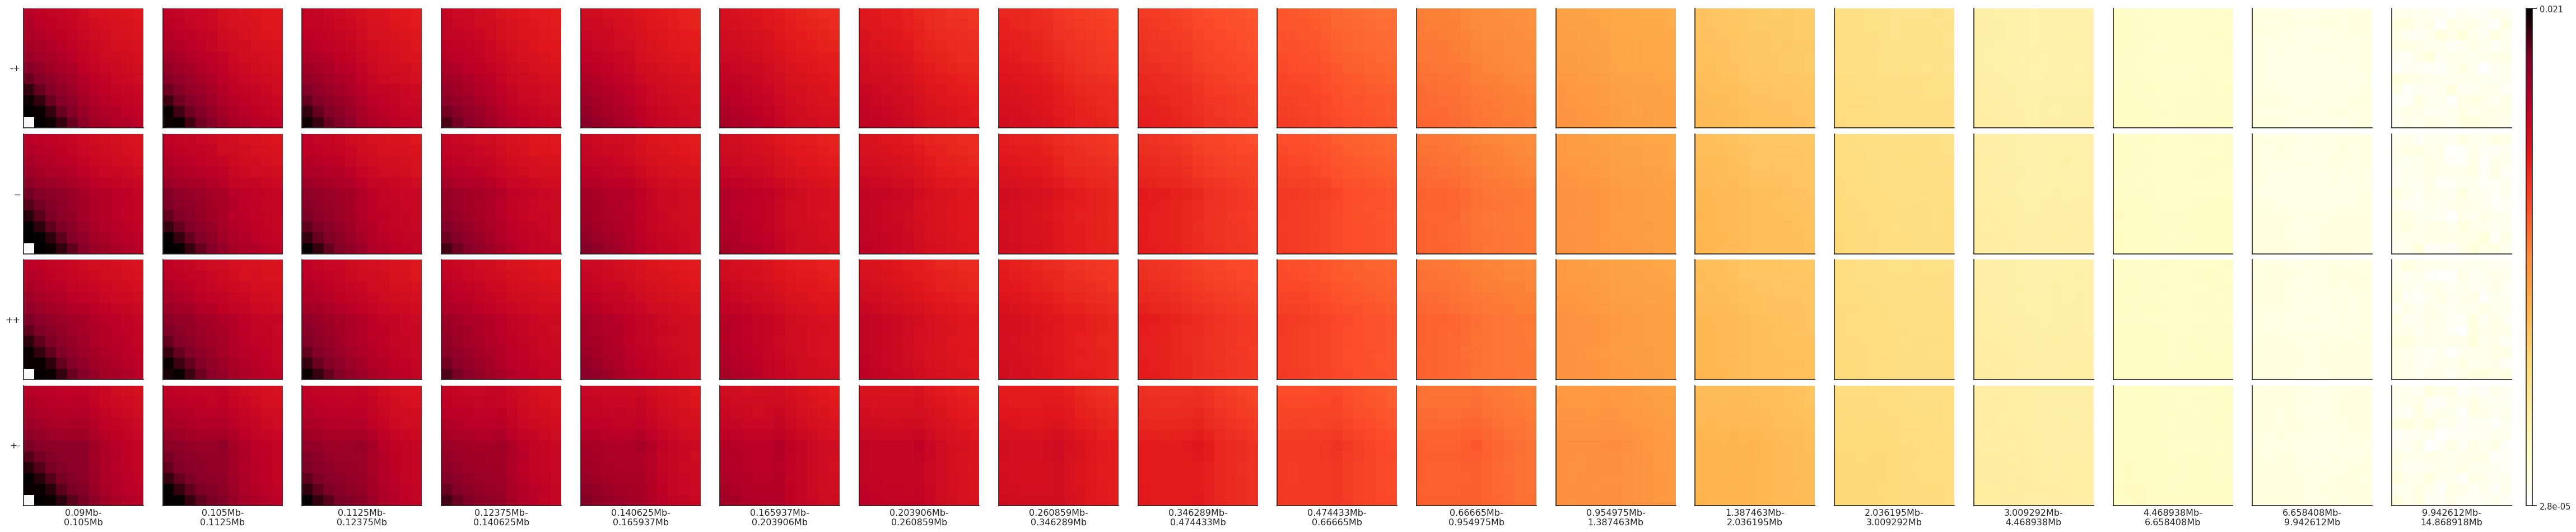

INFO:coolpuppy:('chr18', 'chr18'): 80224
INFO:coolpuppy:('chr19', 'chr19'): 98648
INFO:coolpuppy:('chr16', 'chr16'): 102895
INFO:coolpuppy:('chr14', 'chr14'): 120236
INFO:coolpuppy:('chr12', 'chr12'): 122315
INFO:coolpuppy:('chr3', 'chr3'): 130287
INFO:coolpuppy:('chr13', 'chr13'): 131114
INFO:coolpuppy:('chr15', 'chr15'): 146075
INFO:coolpuppy:('chr10', 'chr10'): 153343
INFO:coolpuppy:('chr17', 'chr17'): 158558
INFO:coolpuppy:('chr8', 'chr8'): 193718
INFO:coolpuppy:('chr1', 'chr1'): 201880
INFO:coolpuppy:('chr6', 'chr6'): 212495
INFO:coolpuppy:('chr7', 'chr7'): 227366
INFO:coolpuppy:('chr9', 'chr9'): 235946
INFO:coolpuppy:('chr4', 'chr4'): 257885
INFO:coolpuppy:('chr2', 'chr2'): 267984
INFO:coolpuppy:('chr11', 'chr11'): 315794
INFO:coolpuppy:('chr5', 'chr5'): 330401
INFO:coolpuppy:Total number of piled up windows: 3487164


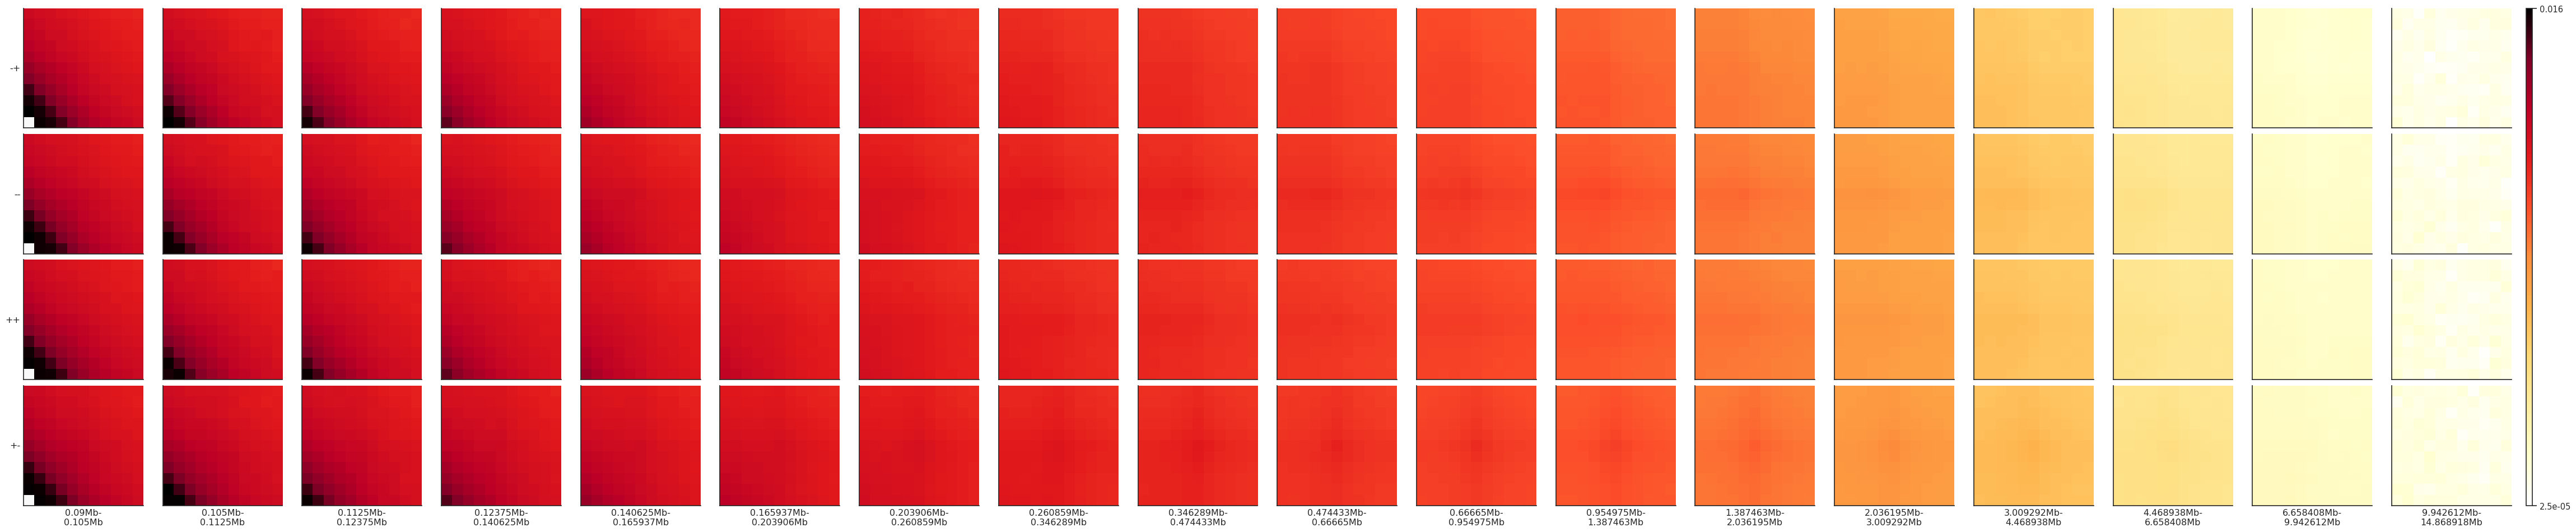

In [40]:
sites=peaks_motifs_bin.copy()

print(band_edge_list)

for sample in sample_dict_liu_new:
    f=open('dots_vs_distance_peaks_motifs_%s_Liu_new_bin.csv'%sample,'w')
    f.write('orientation,dist,peak_score\n')
    mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
    liu_cooler_new = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
    view_df_liu_new = cooltools.lib.make_cooler_view(liu_cooler_new)[:19]
    clr =  liu_cooler_new
    pup = coolpup.pileup(clr, 
                         sites, 
                         features_format='bed', view_df=view_df_liu_new[:19],
                         flip_negative_strand=True,
                         by_distance=np.array(band_edges),
                         by_strand=True, mindist=mindist, maxdist=10_000_000,
                        flank=50_000, min_diag=2,
                        nproc=19
                        )
    for i in range(len(pup['data'])):
        pseudocount = np.mean(np.isfinite(pup['data'][i]))/1000
        score=peak_score(pup['data'][i],3,4,pseudocount)
        if pup['separation'][i]=='all':
            continue
            
        dist=np.mean(pup['distance_band'][i])
        orientation=pup['orientation'][i]
        f.write('%s,%s,%s\n'%(orientation,dist,score))
    fg = plotpup.plot(pup,  rows='orientation',cols='separation',
                  row_order=['-+', '--', '++', '+-'],score=False, 
                  cmap='fall', 
                  scale='log', sym=False,
                  height=3)
    
    plt.show()
    f.close()

### peak score vs distance

In [31]:
from scipy.ndimage import gaussian_filter1d
def smooth(x, sigma = 1.5):
        return gaussian_filter1d(x, sigma)

In [32]:
# Bonev et al

WT 1.04991721902135
weight average mean is 1.006858494008707
weight average mean for convergent is 1.0214191793205334


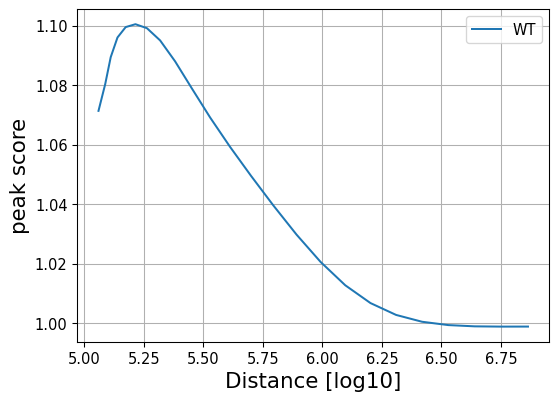

In [154]:
fig, axs = plt.subplots(1, 1, figsize=(6.35, 4.5))  # 3 rows, 1 column

new_sample_dict =['WT']


def smooth(x, sigma = 1.815):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_WT_Bonev_bin_s_Justice.csv')
    data=data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    
    pixel_start=1
    axs.plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],label='%s'%name)
    print(name,np.mean(list(score_ave)[1:]))
    #data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_bin_s.csv'%name)
    n_tot = data['n'].sum()
    data ['score_mult_n'] = (data['peak_score']*data['n'])
    data_mean_weight = (data['score_mult_n'].sum())/n_tot
    data_conv_wes = data[data['orientation']=='+-']
    n_conv_tot = data_conv_wes['n'].sum()
    data_mean_weight_conv = (data_conv_wes['score_mult_n']).sum()/n_conv_tot
    #data_mean_weight
    print('weight average mean is %s'%data_mean_weight)
    print('weight average mean for convergent is %s'%data_mean_weight_conv)
axs.grid(True)
axs.set_xlabel('Distance [log10]', fontsize = 16)
axs.legend(fontsize=11)
axs.set_ylabel('peak score',fontsize = 16)
axs.tick_params(labelsize=11)
axs.tick_params(labelsize=11)
plt.show()


In [208]:
# Liu et al

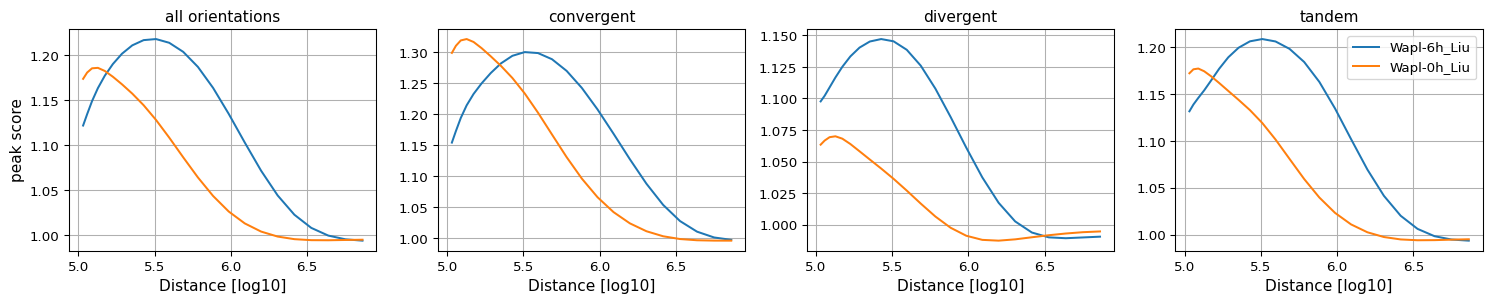

In [169]:
fig, axs = plt.subplots(1, 4, figsize=(19, 3))  # 3 rows, 1 column

new_sample_dict =['Wapl-6h_Liu','Wapl-0h_Liu']#,'WT_Bonev', 'Wapl-0h_new_Liu_','Wapl-24h_new_Liu_']


def smooth(x, sigma = 1.93):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    #print(name)
    data=pd.read_csv('../../../data/peakscore_for_experimetnal/dots_vs_distance_peaks_motifs_%s_quartile.csv'%name)
    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    #print(score_ave.iloc[:])
    pixel_start = 1
    axs[1].plot(np.log10(dist_conv)[pixel_start:],smooth(score_conv)[pixel_start:],label='%s'%name)
    axs[0].plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],label='%s'%name)
    axs[2].plot(np.log10(dist_conv)[pixel_start:],smooth(score_dive)[pixel_start:],label='%s'%name)
    axs[3].plot(np.log10(dist_conv)[pixel_start:], smooth(score_tandemp)[pixel_start:], label='%s'%name)
#plt.ylabel('Peak score',fontsize = 11.5)
plt.xlabel('off-diagonal distance [mb]',fontsize = 11.5)
axs[1].set_title('convergent', fontsize = 11.5)
axs[2].set_title('divergent', fontsize = 11.5)
axs[3].set_title('tandem', fontsize = 11.5)
axs[0].set_title('all orientations', fontsize = 11.5)
for ax in axs:
    ax.grid(True)
    ax.set_xlabel('Distance [log10]', fontsize = 11.5)
    #ax.set_ylim(0.95,1.35)
axs[3].legend( bbox_to_anchor=(1.0005, 0.87),loc='right')
axs[0].set_ylabel('peak score',fontsize = 11.5)

#plt.suptitle('Observed, ctcf & motifs, Rini\'s new data', fontsize=15, y=1.05)
plt.tight_layout(rect=[10, 10.3, 10.15, 10.95])
#plt.savefig('../../images/observed_for_ctcf&motifs_from_papers.pdf', bbox_inches = 'tight')
plt.show()

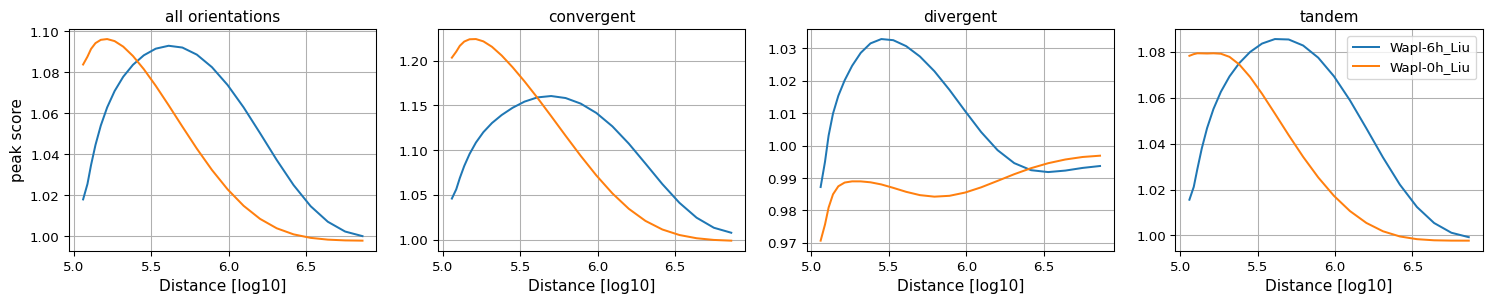

In [209]:
fig, axs = plt.subplots(1, 4, figsize=(19, 3))  # 3 rows, 1 column

new_sample_dict =['Wapl-6h_Liu','Wapl-0h_Liu']#,'WT_Bonev', 'Wapl-0h_new_Liu_','Wapl-24h_new_Liu_']


def smooth(x, sigma = 1.93):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    #print(name)
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000.csv'%name)
    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    #print(score_ave.iloc[:])
    pixel_start = 1
    axs[1].plot(np.log10(dist_conv)[pixel_start:],smooth(score_conv)[pixel_start:],label='%s'%name)
    axs[0].plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],label='%s'%name)
    axs[2].plot(np.log10(dist_conv)[pixel_start:],smooth(score_dive)[pixel_start:],label='%s'%name)
    axs[3].plot(np.log10(dist_conv)[pixel_start:], smooth(score_tandemp)[pixel_start:], label='%s'%name)
#plt.ylabel('Peak score',fontsize = 11.5)
plt.xlabel('off-diagonal distance [mb]',fontsize = 11.5)
axs[1].set_title('convergent', fontsize = 11.5)
axs[2].set_title('divergent', fontsize = 11.5)
axs[3].set_title('tandem', fontsize = 11.5)
axs[0].set_title('all orientations', fontsize = 11.5)
for ax in axs:
    ax.grid(True)
    ax.set_xlabel('Distance [log10]', fontsize = 11.5)
    #ax.set_ylim(0.95,1.35)
axs[3].legend( bbox_to_anchor=(1.0005, 0.87),loc='right')
axs[0].set_ylabel('peak score',fontsize = 11.5)

plt.show()

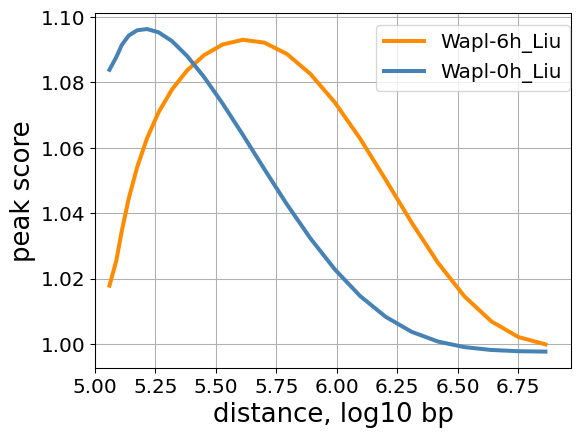

In [210]:
for name in new_sample_dict[:]:
    if name=='Wapl-6h_Liu':
        color='darkorange'
    else: 
        color='steelblue'
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000.csv'%name)
    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    pixel_start =1
    plt.plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],linewidth = 3, color=color,label='%s'%name)
plt.grid(True)
plt.xlim(5,6.97)
plt.xlabel('distance, log10 kb',fontsize=14.5)
plt.ylabel('peak score',fontsize = 14.5)
plt.ylabel('peak score',fontsize = 19.5)
plt.xlabel('distance, log10 bp', fontsize = 19.5)
plt.legend(loc=(0.591,0.781), fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('observed_for_ctcf&motifs_from_papers_bin_all.pdf', bbox_inches = 'tight')
plt.show()

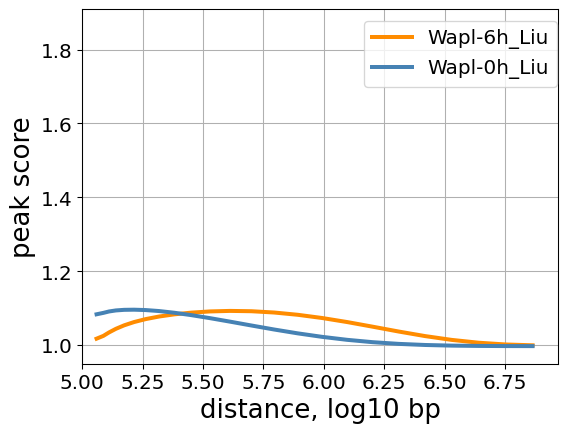

In [211]:
for name in new_sample_dict[:]:
    if name=='Wapl-6h_Liu':
        color='darkorange'
    else: 
        color='steelblue'
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000.csv'%name)
    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    pixel_start =1
    plt.plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],linewidth = 3, color=color,label='%s'%name)
plt.grid(True)
plt.xlim(5,6.97)
plt.ylim(0.95,1.91)
plt.xlabel('distance, log10 kb',fontsize=14.5)
plt.ylabel('peak score',fontsize = 14.5)
plt.ylabel('peak score',fontsize = 19.5)
plt.xlabel('distance, log10 bp', fontsize = 19.5)
plt.legend(loc=(0.591,0.781), fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('observed_for_ctcf&motifs_from_papers_bin_all_mag.pdf', bbox_inches = 'tight')
plt.show()

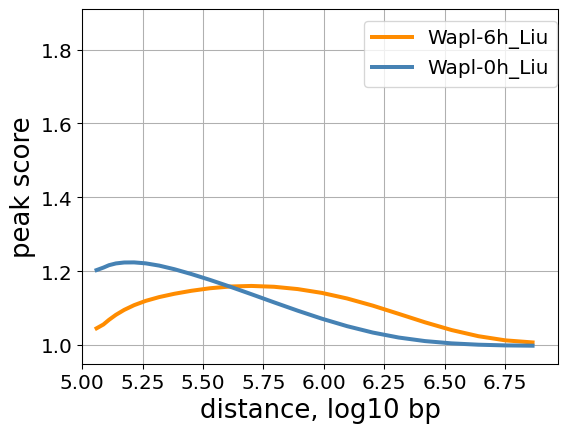

In [212]:
for name in new_sample_dict[:]:
    if name=='Wapl-6h_Liu':
        color='darkorange'
    else: 
        color='steelblue'
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000.csv'%name)

    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    pixel_start =1
    plt.plot(np.log10(dist_conv)[pixel_start:],smooth(score_conv)[pixel_start:],linewidth = 3, color=color,label='%s'%name)
plt.grid(True)
plt.xlim(5,6.97)
plt.ylim(0.95,1.91)
plt.xlabel('distance, log10 kb',fontsize=14.5)
plt.ylabel('peak score',fontsize = 14.5)
plt.ylabel('peak score',fontsize = 19.5)
plt.xlabel('distance, log10 bp', fontsize = 19.5)
plt.legend(loc=(0.591,0.781), fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('observed_for_ctcf&motifs_from_papers_bin_sconv_mag.pdf', bbox_inches = 'tight')
plt.show()

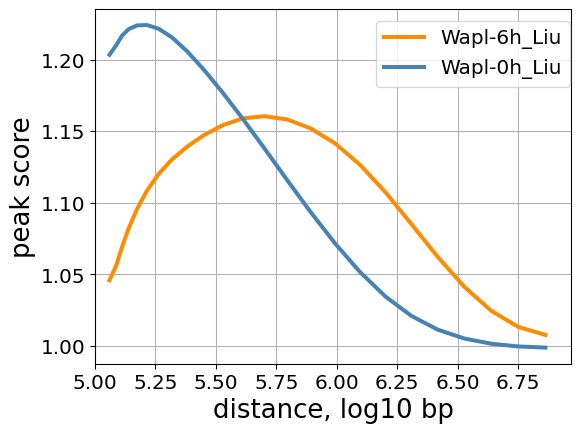

In [213]:
for name in new_sample_dict[:]:
    if name=='Wapl-6h_Liu':
        color='darkorange'
    else: 
        color='steelblue'
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000.csv'%name)

    data = data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    pixel_start =1
    plt.plot(np.log10(dist_conv)[pixel_start:],smooth(score_conv)[pixel_start:],linewidth = 3, color=color,label='%s'%name)
plt.grid(True)
plt.xlim(5,6.97)
#plt.ylim(0.95,1.91)
plt.xlabel('distance, log10 kb',fontsize=14.5)
plt.ylabel('peak score',fontsize = 14.5)
plt.ylabel('peak score',fontsize = 19.5)
plt.xlabel('distance, log10 bp', fontsize = 19.5)
plt.legend(loc=(0.591,0.781), fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('observed_for_ctcf&motifs_from_papers_bin_sconv.pdf', bbox_inches = 'tight')
plt.show()

Wapl-6h_Liu 1.061242722974365
weight average mean is 1.0250612520512985
weight average mean for convergent is 1.0544578247934169
Wapl-0h_Liu 1.0570503997180414
weight average mean is 1.007297394248631
weight average mean for convergent is 1.0242043006494237


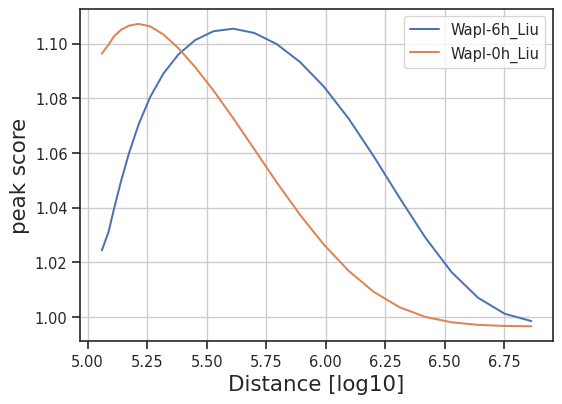

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(6.35, 4.5))  # 3 rows, 1 column

new_sample_dict =['Wapl-6h_Liu','Wapl-0h_Liu',]


def smooth(x, sigma = 1.815):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    #print(name)
    data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_bin_s.csv'%name)
    data=data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    
    pixel_start=1
    axs.plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],label='%s'%name)
    print(name,np.mean(list(score_ave)[1:]))
    #data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_bin_s.csv'%name)
    n_tot = data['n'].sum()
    data ['score_mult_n'] = (data['peak_score']*data['n'])
    data_mean_weight = (data['score_mult_n'].sum())/n_tot
    data_conv_wes = data[data['orientation']=='+-']
    n_conv_tot = data_conv_wes['n'].sum()
    data_mean_weight_conv = (data_conv_wes['score_mult_n']).sum()/n_conv_tot
    #data_mean_weight
    print('weight average mean is %s'%data_mean_weight)
    print('weight average mean for convergent is %s'%data_mean_weight_conv)

axs.grid(True)
axs.set_xlabel('Distance [log10]', fontsize = 16)
axs.legend(fontsize=11)
axs.set_ylabel('peak score',fontsize = 16)
axs.tick_params(labelsize=11)
axs.tick_params(labelsize=11)
#plt.suptitle('Observed, ctcf & motifs, Rini\'s new data', fontsize=15, y=1.05)
#plt.tight_layout(rect=[10, 10.3, 10.15, 10.95])
plt.savefig('../../../images/observed_for_ctcf&motifs_from_papers_top_quart_ave.pdf', transparent=True, bbox_inches = 'tight')
plt.show()

In [45]:
data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_bin_s.csv'%name)
n_tot = data['n'].sum()
data ['score_mult_n'] = (data['peak_score']*data['n'])
data_mean_weight = (data['score_mult_n'].sum())/n_tot
data_mean_weight

1.0070022223708457

Wapl-6h_Liu 1.053883092891853
weight average mean is 1.021790374277569
weight average mean for convergent is 1.0491949753408962
Wapl-0h_Liu 1.05099618472769
weight average mean is 1.0066877625275277
weight average mean for convergent is 1.0233434710016294


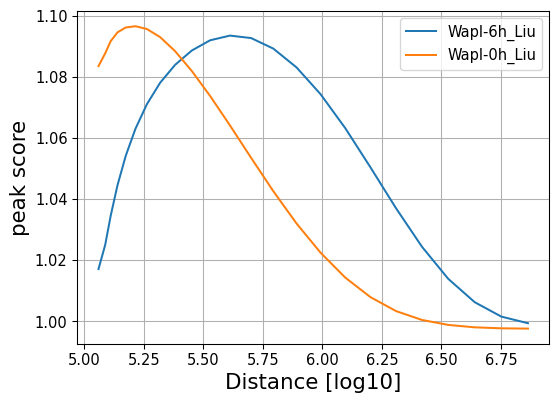

In [218]:
fig, axs = plt.subplots(1, 1, figsize=(6.35, 4.5))  # 3 rows, 1 column

new_sample_dict =['Wapl-6h_Liu','Wapl-0h_Liu',]


def smooth(x, sigma = 1.815):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    data = pd.read_csv('/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/python_codes_calculations/dots_vs_distance_peaks_motifs_%s_bin_s_pseudo1000_Justice.csv'%name)

    data=data[data['dist']<=7500000]
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    
    pixel_start=1
    axs.plot(np.log10(dist_conv)[pixel_start:],smooth(score_ave)[pixel_start:],label='%s'%name)
    print(name,np.mean(list(score_ave)[1:]))
    #data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_bin_s.csv'%name)
    n_tot = data['n'].sum()
    data ['score_mult_n'] = (data['peak_score']*data['n'])
    data_mean_weight = (data['score_mult_n'].sum())/n_tot
    data_conv_wes = data[data['orientation']=='+-']
    n_conv_tot = data_conv_wes['n'].sum()
    data_mean_weight_conv = (data_conv_wes['score_mult_n']).sum()/n_conv_tot
    #data_mean_weight
    print('weight average mean is %s'%data_mean_weight)
    print('weight average mean for convergent is %s'%data_mean_weight_conv)
axs.grid(True)
axs.set_xlabel('Distance [log10]', fontsize = 16)
axs.legend(fontsize=11)
axs.set_ylabel('peak score',fontsize = 16)
axs.tick_params(labelsize=11)
axs.tick_params(labelsize=11)
plt.show()

In [96]:
# Liu et al new

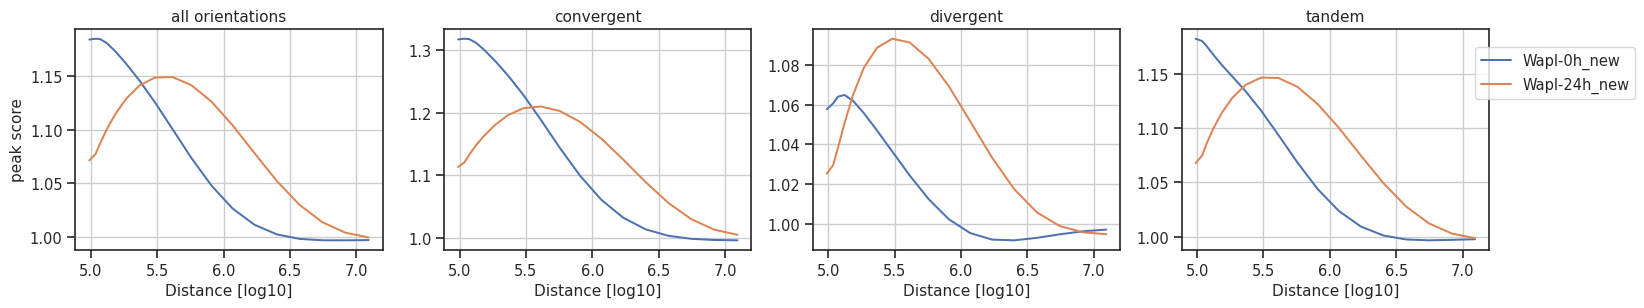

In [101]:
fig, axs = plt.subplots(1, 4, figsize=(19, 3))  # 3 rows, 1 column

new_sample_dict =['Wapl-0h_new','Wapl-24h_new']#,'WT_Bonev', 'Wapl-0h_new_Liu_','Wapl-24h_new_Liu_']

sample_dict_liu_new ={
    'Wapl-0h_new':'liu_wapl0h.mm10.mapq_30.1000.mcool',
    'Wapl-24h_new':'liu_wapl24h.mm10.mapq_30.1000.mcool'
}
def smooth(x, sigma = 1.95):
        return gaussian_filter1d(x, sigma)
for name in new_sample_dict[:15]:
    data=pd.read_csv('dots_vs_distance_peaks_motifs_%s_Liu_new_quartile.csv'%name)
    dist_conv=data[data['orientation']=='+-']['dist']
    score_conv=data[data['orientation']=='+-']['peak_score']
    dist_dive=data[data['orientation']=='-+']['dist']
    score_dive=data[data['orientation']=='-+']['peak_score']
    dist_tandemp=data[data['orientation']=='++']['dist']
    score_tandemp=data[data['orientation']=='++']['peak_score']
    dist_tandemn=data[data['orientation']=='--']['dist']
    score_tandemn=data[data['orientation']=='--']['peak_score']
    score_ave=data.groupby('dist')['peak_score'].mean()
    #print(score_ave.iloc[:])
    axs[1].plot(np.log10(dist_conv),smooth(score_conv),label='%s'%name)
    axs[0].plot(np.log10(dist_conv),smooth(score_ave),label='%s'%name)
    axs[2].plot(np.log10(dist_conv),smooth(score_dive),label='%s'%name)
    axs[3].plot(np.log10(dist_conv), smooth(score_tandemp), label='%s'%name)
#plt.ylabel('Peak score',fontsize = 11.5)
plt.xlabel('off-diagonal distance [mb]',fontsize = 11.5)
axs[1].set_title('convergent', fontsize = 11.5)
axs[2].set_title('divergent', fontsize = 11.5)
axs[3].set_title('tandem', fontsize = 11.5)
axs[0].set_title('all orientations', fontsize = 11.5)
for ax in axs:
    ax.grid(True)
    ax.set_xlabel('Distance [log10]', fontsize = 11.5)
axs[3].legend( bbox_to_anchor=(1.5, 0.8),loc='right')
axs[0].set_ylabel('peak score',fontsize = 11.5)

plt.tight_layout(rect=[10, 10.3, 10.15, 10.95])
plt.savefig('observed_for_ctcf&motifs_from_papers.png', bbox_inches = 'tight')
plt.show()